# Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image Preprocessing

In [3]:

training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_Recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_Recognition/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


#Building Model


In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolutional Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [11]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) #We've 36 classes

#Compiling and Training Phase

In [12]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
training_history= cnn.fit(x=training_set, validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 720s 7s/step - loss: 9.7868 - accuracy: 0.0427 - val_loss: 3.5243 - val_accuracy: 0.0912
Epoch 2/30
98/98 [==============================] - 123s 1s/step - loss: 4.7212 - accuracy: 0.0671 - val_loss: 3.1371 - val_accuracy: 0.1823
Epoch 3/30
98/98 [==============================] - 116s 1s/step - loss: 4.0642 - accuracy: 0.1143 - val_loss: 3.1276 - val_accuracy: 0.2479
Epoch 4/30
98/98 [==============================] - 120s 1s/step - loss: 4.7112 - accuracy: 0.1525 - val_loss: 2.9944 - val_accuracy: 0.2536
Epoch 5/30
98/98 [==============================] - 113s 1s/step - loss: 3.5309 - accuracy: 0.2016 - val_loss: 2.4829 - val_accuracy: 0.3704
Epoch 6/30
98/98 [==============================] - 112s 1s/step - loss: 3.4956 - accuracy: 0.2607 - val_loss: 2.2595 - val_accuracy: 0.4815
Epoch 7/30
98/98 [==============================] - 110s 1s/step - loss: 3.3040 - accuracy: 0.2892 - val_loss: 1.8897 - val_accuracy: 0.6040
Epoch 8/30
98

##Saving Model

In [14]:
cnn.save('trained.model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
training_history.history

{'loss': [9.786832809448242,
  4.721169471740723,
  4.0642266273498535,
  4.711242198944092,
  3.5308616161346436,
  3.4956119060516357,
  3.3039817810058594,
  3.2900688648223877,
  2.8068349361419678,
  2.2942938804626465,
  2.437925338745117,
  2.4488613605499268,
  1.9145570993423462,
  1.8185635805130005,
  1.5419847965240479,
  1.40584397315979,
  1.3076002597808838,
  1.2727962732315063,
  1.195899248123169,
  1.195658802986145,
  1.212955117225647,
  1.0925966501235962,
  1.111799716949463,
  1.0479260683059692,
  1.0017304420471191,
  0.9778048396110535,
  0.9792599678039551,
  0.9978635311126709,
  0.9760644435882568,
  0.907341718673706],
 'accuracy': [0.04269662871956825,
  0.06709470599889755,
  0.11428571492433548,
  0.15248796343803406,
  0.20160514116287231,
  0.2606741487979889,
  0.2892455756664276,
  0.3659711182117462,
  0.4199036955833435,
  0.48218297958374023,
  0.5139647126197815,
  0.5569823384284973,
  0.5887640714645386,
  0.6292135119438171,
  0.665489554405

In [16]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [17]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating Accuracy of Model Achieved on Validation Set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-2]*100))

Validation set Accuracy: 92.59259104728699 %


#Accuracy Visualization

##Training Visualization

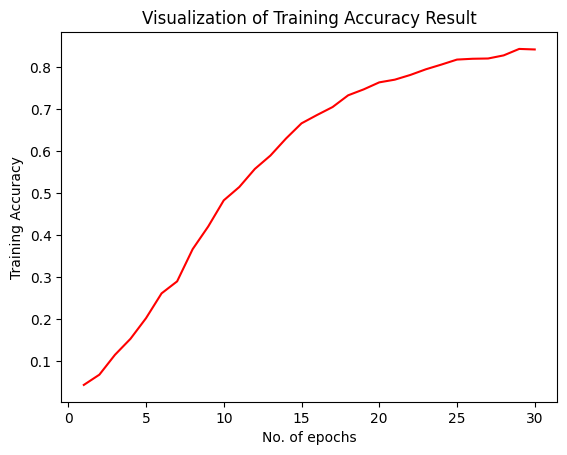

In [31]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

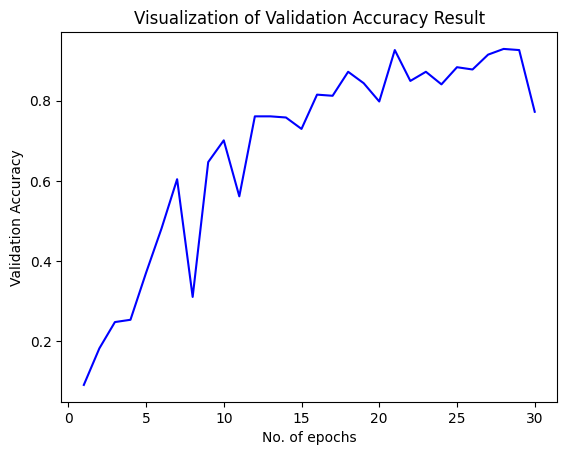

In [33]:
plt.plot(epochs,training_history.history['val_accuracy'], color='blue')
plt.xlabel('No. of epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()